In [198]:
import numpy as np
from numpy.typing import NDArray
from tqdm import tqdm
import time

import torch
import torch.nn as nn  
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [199]:
scaler = StandardScaler()

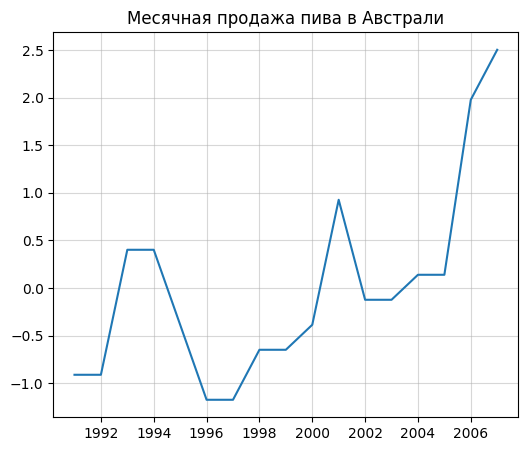

In [200]:
date = list(map(int, '1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007'.split()))
data = list(map(int, '138 138 143 143 140 137 137 139 139 140 145 141 141 142 142 149 151'.split()))

plt.figure(figsize=(6, 5))
plt.title("Месячная продажа пива в Австрали")
plt.plot(date, scaler.fit_transform(np.array([[i] for i in data ])))
plt.grid(alpha=0.5)
# plt.legend()
plt.show()

f(x) = a*x + b

In [152]:
def f(x):
    return x*x


def gd_f(x):
    return 2*x

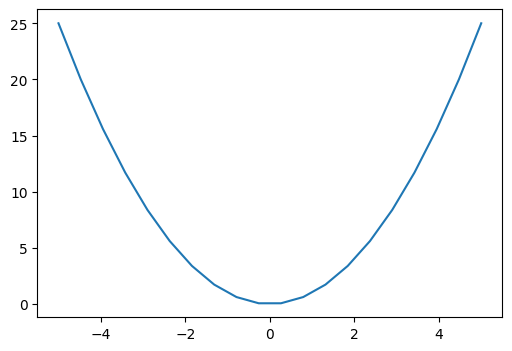

In [ ]:
D = 5

X = np.linspace(-D, D, 20)
y = f(X)

plt.figure(figsize=(6, 4))  
plt.plot(X, y)

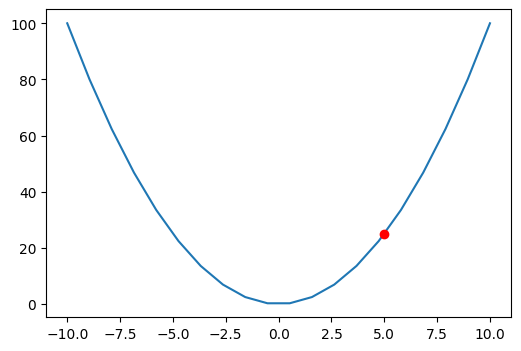

In [166]:
D = 10
start = 5

X = np.linspace(-D, D, 20)
y = f(X)

plt.figure(figsize=(6, 4))
plt.plot(X, y)
plt.plot(start, f(start), marker='o', c="red")
plt.show()

In [167]:
grad = gd_f(start)
grad

10

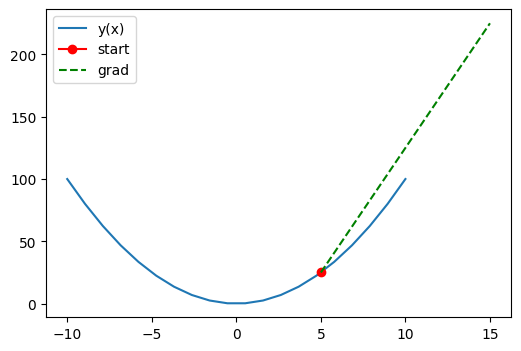

In [173]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
plt.plot(start, f(start), marker='o', c="red", label="start")

next_point = start + grad

plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")
plt.legend()
plt.show()

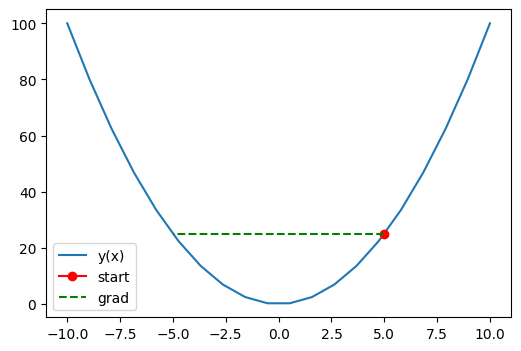

In [174]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
plt.plot(start, f(start), marker='o', c="red", label="start")

next_point = start - grad

plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")
plt.legend()
plt.show()

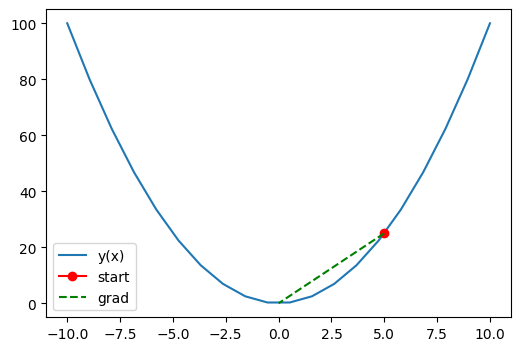

In [177]:
learning_rate = 0.5

plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
plt.plot(start, f(start), marker='o', c="red", label="start")

next_point = start - grad * learning_rate

plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")
plt.legend()
plt.show()

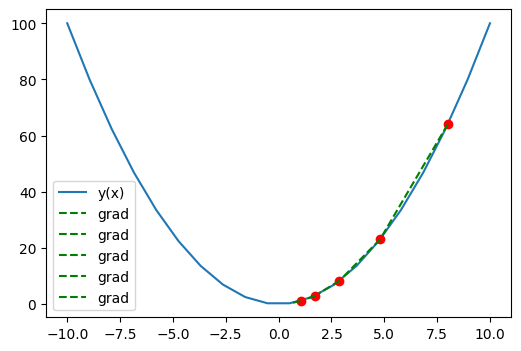

In [ ]:
learning_rate = 0.2
start = 8
iters = 5

plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
for _ in range(iters):
    plt.plot(start, f(start), marker='o', c="red")
    grad = gd_f(start)
    next_point = start - grad*learning_rate
    plt.plot([start, next_point], f(np.array([start, next_point])), '--g', label="grad")

    start = next_point 

plt.legend()
plt.show()

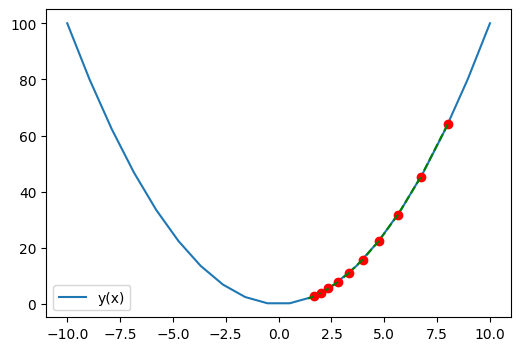

In [212]:
learning_rate = 0.08
start = 8
iters = 10

plt.figure(figsize=(6, 4))
plt.plot(X, y, label="y(x)")
for _ in range(iters):
    plt.plot(start, f(start), marker='o', c="red")
    grad = gd_f(start)
    next_point = start - grad*learning_rate
    plt.plot([start, next_point], f(np.array([start, next_point])), '--g')

    start = next_point

plt.legend()
plt.show()